- Testing ceaser cipher with differnt text length (1000-10000) and differnt keys 
- visulaize execution time for each random key and text 
- calculate the avreage


Text Length: 1000
Key: 3, Encryption Time: 0.000411s, Decryption Time: 0.000392s
Key: 7, Encryption Time: 0.000359s, Decryption Time: 0.000342s
Key: 10, Encryption Time: 0.000331s, Decryption Time: 0.000332s
Key: 16, Encryption Time: 0.000315s, Decryption Time: 0.000327s
Key: 25, Encryption Time: 0.000289s, Decryption Time: 0.000285s
Average Encryption Time for Text Length 1000: 0.000341s
Average Decryption Time for Text Length 1000: 0.000335s

Text Length: 3000
Key: 3, Encryption Time: 0.000831s, Decryption Time: 0.000848s
Key: 7, Encryption Time: 0.000960s, Decryption Time: 0.001145s
Key: 10, Encryption Time: 0.000959s, Decryption Time: 0.000787s
Key: 16, Encryption Time: 0.000814s, Decryption Time: 0.000822s
Key: 25, Encryption Time: 0.001951s, Decryption Time: 0.001349s
Average Encryption Time for Text Length 3000: 0.001103s
Average Decryption Time for Text Length 3000: 0.000990s

Text Length: 5000
Key: 3, Encryption Time: 0.001383s, Decryption Time: 0.002001s
Key: 7, Encryption Ti

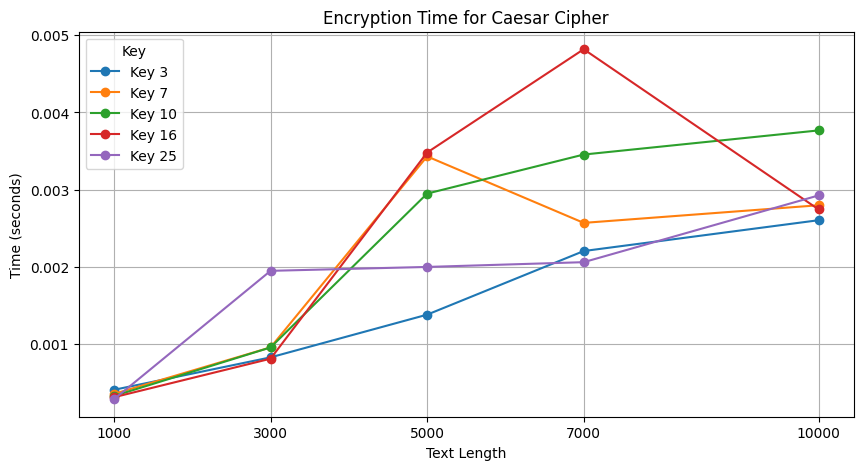

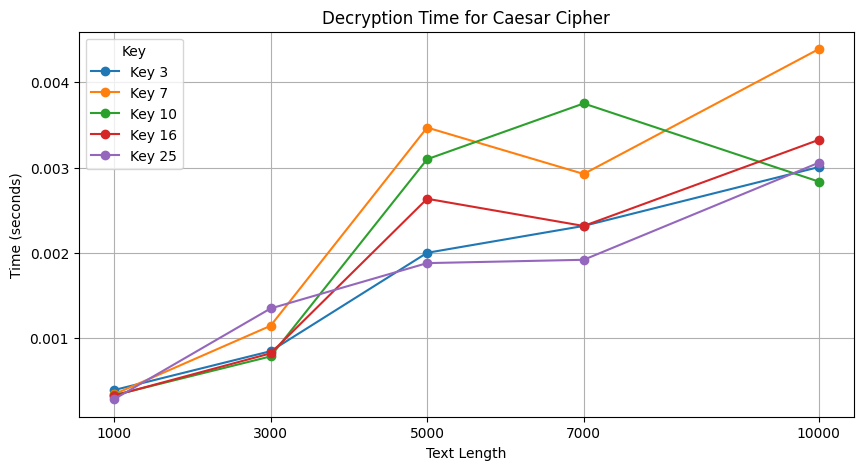

Overall Encryption Average: 0.002017s
Overall Decryption Average: 0.001982s


In [1]:
import time
import matplotlib.pyplot as plt
import random
import string

def generate_random_text(length):
    return ''.join(random.choice(string.ascii_letters + string.digits) for _ in range(length))

def caesar_cipher(text, shift):
    encrypted_text = ""
    for char in text:
        if char.isalpha():
            shifted = ord(char) + shift
            if char.islower():
                if shifted > ord('z'):
                    shifted -= 26
                elif shifted < ord('a'):
                    shifted += 26
            elif char.isupper():
                if shifted > ord('Z'):
                    shifted -= 26
                elif shifted < ord('A'):
                    shifted += 26
            encrypted_text += chr(shifted)
        else:
            encrypted_text += char
    return encrypted_text

# Generate random texts with different lengths and keys
text_lengths = [1000, 3000, 5000, 7000, 10000]
keys = [3, 7, 10, 16, 25]  # Different keys for encryption

encryption_times = []
decryption_times = []
overall_encryption_averages = []
overall_decryption_averages = []

for length in text_lengths:
    random_text = generate_random_text(length)
    print(f"Text Length: {length}")
    
    encryption_time_per_length = []
    decryption_time_per_length = []
    
    for key in keys:
        start_time = time.perf_counter()
        encrypted_text = caesar_cipher(random_text, key)
        encryption_time = time.perf_counter() - start_time
        encryption_time_per_length.append(encryption_time)
        
        start_time = time.perf_counter()
        decrypted_text = caesar_cipher(encrypted_text, -key)
        decryption_time = time.perf_counter() - start_time
        decryption_time_per_length.append(decryption_time)
        
        print(f"Key: {key}, Encryption Time: {encryption_time:.6f}s, Decryption Time: {decryption_time:.6f}s")
    
    encryption_times.append(encryption_time_per_length)
    decryption_times.append(decryption_time_per_length)
    
    # Calculate average for the current text length
    encryption_average = sum(encryption_time_per_length) / len(keys)
    decryption_average = sum(decryption_time_per_length) / len(keys)
    
    overall_encryption_averages.append(encryption_average)
    overall_decryption_averages.append(decryption_average)
    
    print(f"Average Encryption Time for Text Length {length}: {encryption_average:.6f}s")
    print(f"Average Decryption Time for Text Length {length}: {decryption_average:.6f}s")
    print()

# Plotting Encryption Time
plt.figure(figsize=(10, 5))
for i, key in enumerate(keys):
    encryption_times_key = [times[i] for times in encryption_times]
    plt.plot(text_lengths, encryption_times_key, marker='o', label=f"Key {key}")

plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Encryption Time for Caesar Cipher')
plt.legend(title='Key')
plt.grid(True)
plt.xticks(text_lengths)
plt.show()

# Plotting Decryption Time
plt.figure(figsize=(10, 5))
for i, key in enumerate(keys):
    decryption_times_key = [times[i] for times in decryption_times]
    plt.plot(text_lengths, decryption_times_key, marker='o', label=f"Key {key}")

plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Decryption Time for Caesar Cipher')
plt.legend(title='Key')
plt.grid(True)
plt.xticks(text_lengths)
plt.show()

# Calculate overall averages
overall_encryption_average = sum(overall_encryption_averages) / len(text_lengths)
overall_decryption_average = sum(overall_decryption_averages) / len(text_lengths)

print(f"Overall Encryption Average: {overall_encryption_average:.6f}s")
print(f"Overall Decryption Average: {overall_decryption_average:.6f}s")


- Playfair


Text Length: 1000
Encryption Time: 0.001095s, Decryption Time: 0.002105s

Text Length: 3000
Encryption Time: 0.004011s, Decryption Time: 0.004031s

Text Length: 5000
Encryption Time: 0.007993s, Decryption Time: 0.011998s

Text Length: 7000
Encryption Time: 0.012012s, Decryption Time: 0.012012s

Text Length: 10000
Encryption Time: 0.011975s, Decryption Time: 0.012042s



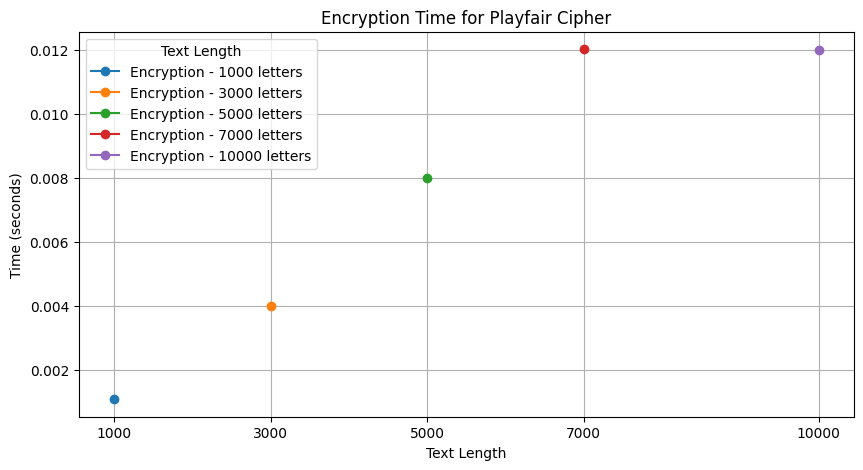

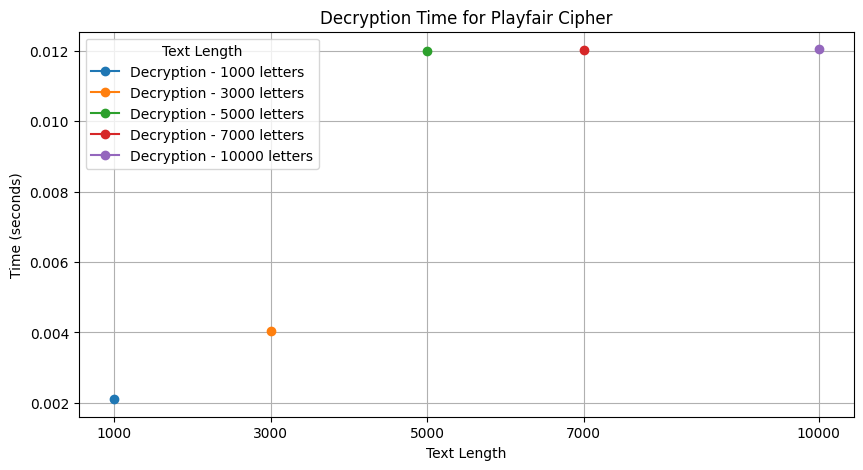

Average Encryption Time: 0.007417s
Average Decryption Time: 0.008438s


In [2]:
import time
import matplotlib.pyplot as plt
import random
import string

# Function to generate a random key matrix for Playfair cipher
def generate_key_matrix():
    alphabet = string.ascii_uppercase.replace('J', '')  # Playfair cipher excludes 'J'
    key = list(alphabet)
    random.shuffle(key)
    key_matrix = [key[i:i+5] for i in range(0, 25, 5)]
    return key_matrix

# Function to find the coordinates of a letter in the key matrix
def find_letter(letter, key_matrix):
    for i in range(5):
        for j in range(5):
            if key_matrix[i][j] == letter:
                return i, j

# Function to encrypt using Playfair cipher
def playfair_encrypt(plaintext, key_matrix):
    plaintext = plaintext.upper().replace('J', 'I')  # Playfair cipher excludes 'J'
    ciphertext = ""
    for i in range(0, len(plaintext), 2):
        char1 = plaintext[i]
        char2 = plaintext[i+1] if i+1 < len(plaintext) else 'X'  # Padding with 'X' if odd length
        row1, col1 = find_letter(char1, key_matrix)
        row2, col2 = find_letter(char2, key_matrix)
        if row1 == row2:  # Same row
            ciphertext += key_matrix[row1][(col1 + 1) % 5]
            ciphertext += key_matrix[row2][(col2 + 1) % 5]
        elif col1 == col2:  # Same column
            ciphertext += key_matrix[(row1 + 1) % 5][col1]
            ciphertext += key_matrix[(row2 + 1) % 5][col2]
        else:  # Forming rectangle
            ciphertext += key_matrix[row1][col2]
            ciphertext += key_matrix[row2][col1]
    return ciphertext

# Function to decrypt using Playfair cipher
def playfair_decrypt(ciphertext, key_matrix):
    plaintext = ""
    for i in range(0, len(ciphertext), 2):
        char1 = ciphertext[i]
        char2 = ciphertext[i+1]
        row1, col1 = find_letter(char1, key_matrix)
        row2, col2 = find_letter(char2, key_matrix)
        if row1 == row2:  # Same row
            plaintext += key_matrix[row1][(col1 - 1) % 5]
            plaintext += key_matrix[row2][(col2 - 1) % 5]
        elif col1 == col2:  # Same column
            plaintext += key_matrix[(row1 - 1) % 5][col1]
            plaintext += key_matrix[(row2 - 1) % 5][col2]
        else:  # Forming rectangle
            plaintext += key_matrix[row1][col2]
            plaintext += key_matrix[row2][col1]
    return plaintext

# Generate random texts with different lengths
text_lengths = [1000, 3000, 5000, 7000, 10000]

encryption_times = []
decryption_times = []

for length in text_lengths:
    random_text = ''.join(random.choices(string.ascii_uppercase.replace('J', ''), k=length))  # Exclude 'J'
    print(f"Text Length: {length}")
    
    key_matrix = generate_key_matrix()
    encryption_time_per_length = []
    decryption_time_per_length = []
    
    start_time = time.time()
    encrypted_text = playfair_encrypt(random_text, key_matrix)
    encryption_time = time.time() - start_time
    encryption_time_per_length.append(encryption_time)
    
    start_time = time.time()
    decrypted_text = playfair_decrypt(encrypted_text, key_matrix)
    decryption_time = time.time() - start_time
    decryption_time_per_length.append(decryption_time)
    
    print(f"Encryption Time: {encryption_time:.6f}s, Decryption Time: {decryption_time:.6f}s")
    
    encryption_times.append(encryption_time_per_length)
    decryption_times.append(decryption_time_per_length)
    print()

# Calculate average encryption and decryption times for all keys
avg_encryption_time_playfair = sum([time for sublist in encryption_times for time in sublist]) / len(text_lengths)
avg_decryption_time_playfair = sum([time for sublist in decryption_times for time in sublist]) / len(text_lengths)


plt.figure(figsize=(10, 5))
for i, length in enumerate(text_lengths):
    plt.plot([length], encryption_times[i], marker='o', label=f"Encryption - {length} letters")

plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Encryption Time for Playfair Cipher')
plt.legend(title='Text Length')
plt.grid(True)
plt.xticks(text_lengths)  # Set x-ticks to text lengths
plt.show()

# Plotting Decryption Time
plt.figure(figsize=(10, 5))
for i, length in enumerate(text_lengths):
    plt.plot([length], decryption_times[i], marker='o', label=f"Decryption - {length} letters")

plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Decryption Time for Playfair Cipher')
plt.legend(title='Text Length')
plt.grid(True)
plt.xticks(text_lengths)  # Set x-ticks to text lengths
plt.show()


print(f"Average Encryption Time: {avg_encryption_time_playfair:.6f}s")
print(f"Average Decryption Time: {avg_decryption_time_playfair:.6f}s")

- Vigenere

Text Length: 1000
Avg Encryption Time: 0.001148s, Avg Decryption Time: 0.000204s

Text Length: 3000
Avg Encryption Time: 0.000236s, Avg Decryption Time: 0.001610s

Text Length: 5000
Avg Encryption Time: 0.002407s, Avg Decryption Time: 0.001600s

Text Length: 7000
Avg Encryption Time: 0.004003s, Avg Decryption Time: 0.000792s

Text Length: 10000
Avg Encryption Time: 0.002438s, Avg Decryption Time: 0.003968s

Average Encryption Time for all lengths: 0.002046s
Average Decryption Time for all lengths: 0.001635s


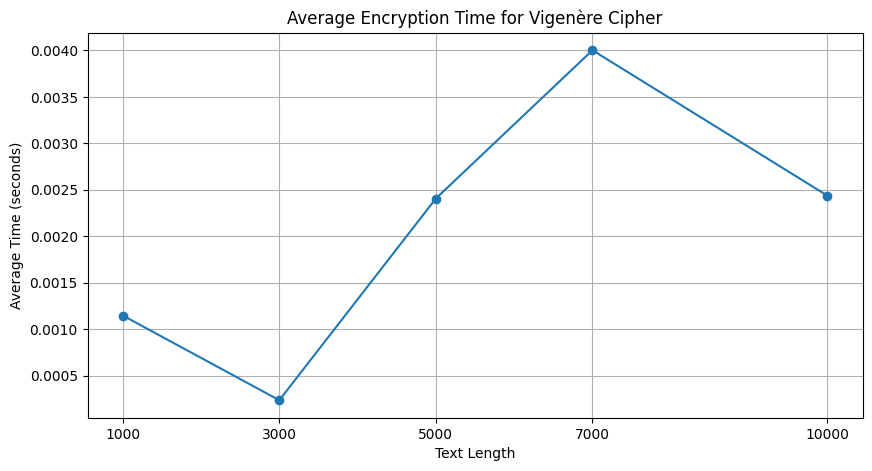

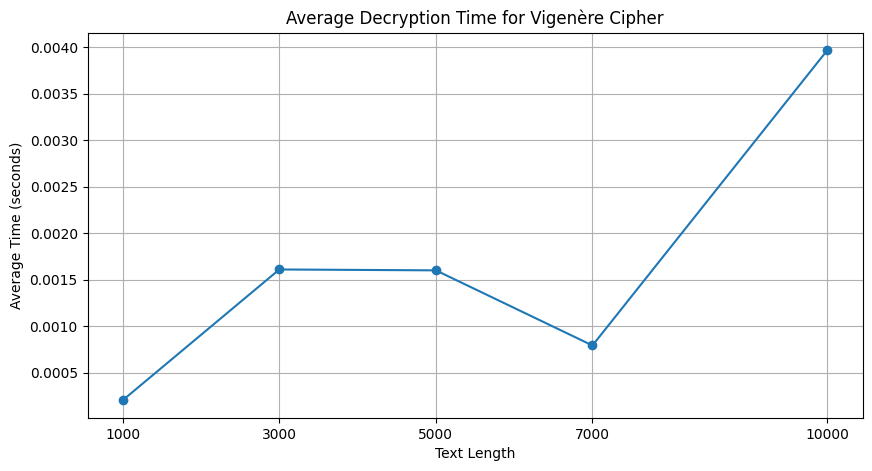

In [3]:
import time
import matplotlib.pyplot as plt
import random
import string

# Function to generate a random key for Vigenère cipher
def generate_key(length):
    return ''.join(random.choices(string.ascii_uppercase, k=length))

# Function to encrypt using Vigenère cipher
def vigenere_encrypt(plaintext, key):
    encrypted_text = ""
    key_length = len(key)
    for i in range(len(plaintext)):
        shift = ord(key[i % key_length]) - 65  # Convert ASCII to shift value
        encrypted_text += chr((ord(plaintext[i]) - 65 + shift) % 26 + 65)
    return encrypted_text

# Function to decrypt using Vigenère cipher
def vigenere_decrypt(ciphertext, key):
    decrypted_text = ""
    key_length = len(key)
    for i in range(len(ciphertext)):
        shift = ord(key[i % key_length]) - 65  # Convert ASCII to shift value
        decrypted_text += chr((ord(ciphertext[i]) - 65 - shift) % 26 + 65)
    return decrypted_text

# Generate random texts with different lengths
text_lengths = [1000, 3000, 5000, 7000, 10000]

encryption_times = []
decryption_times = []

for length in text_lengths:
    random_text = ''.join(random.choices(string.ascii_uppercase, k=length))
    print(f"Text Length: {length}")
    
    key = generate_key(length // 10)  # Key length is 1/10 of text length
    
    encryption_time_per_length = []
    decryption_time_per_length = []
    
    for _ in range(5):  # Repeat the process for 5 different keys
        key = generate_key(length // 10)  # Generate a new key
        
        start_time = time.time()
        encrypted_text = vigenere_encrypt(random_text, key)
        encryption_time = time.time() - start_time
        encryption_time_per_length.append(encryption_time)
        
        start_time = time.time()
        decrypted_text = vigenere_decrypt(encrypted_text, key)
        decryption_time = time.time() - start_time
        decryption_time_per_length.append(decryption_time)
    
    avg_encryption_time = sum(encryption_time_per_length) / len(encryption_time_per_length)
    avg_decryption_time = sum(decryption_time_per_length) / len(decryption_time_per_length)
    
    print(f"Avg Encryption Time: {avg_encryption_time:.6f}s, Avg Decryption Time: {avg_decryption_time:.6f}s")
    encryption_times.append(avg_encryption_time)
    decryption_times.append(avg_decryption_time)
    print()

# Calculate average encryption and decryption times for all lengths
avg_encryption_time_all_lengths_vigenere = sum(encryption_times) / len(encryption_times)
avg_decryption_time_all_lengths_vigenere = sum(decryption_times) / len(decryption_times)

print(f"Average Encryption Time for all lengths: {avg_encryption_time_all_lengths_vigenere:.6f}s")
print(f"Average Decryption Time for all lengths: {avg_decryption_time_all_lengths_vigenere:.6f}s")

plt.figure(figsize=(10, 5))
plt.plot(text_lengths, encryption_times, marker='o')
plt.xlabel('Text Length')
plt.ylabel('Average Time (seconds)')
plt.title('Average Encryption Time for Vigenère Cipher')
plt.grid(True)
plt.xticks(text_lengths)  # Set x-ticks to text lengths
plt.show()

# Plotting Decryption Time
plt.figure(figsize=(10, 5))
plt.plot(text_lengths, decryption_times, marker='o')
plt.xlabel('Text Length')
plt.ylabel('Average Time (seconds)')
plt.title('Average Decryption Time for Vigenère Cipher')
plt.grid(True)
plt.xticks(text_lengths)  # Set x-ticks to text lengths
plt.show()


- Row transposition cipher

Text Length: 1000
Encryption Time: 0.003999s, Decryption Time: 0.000000s

Text Length: 3000
Encryption Time: 0.000000s, Decryption Time: 0.003011s

Text Length: 5000
Encryption Time: 0.002178s, Decryption Time: 0.000179s

Text Length: 7000
Encryption Time: 0.002039s, Decryption Time: 0.000000s

Text Length: 10000
Encryption Time: 0.004032s, Decryption Time: 0.000000s

Average Encryption Time: 0.002450s
Average Decryption Time: 0.000638s


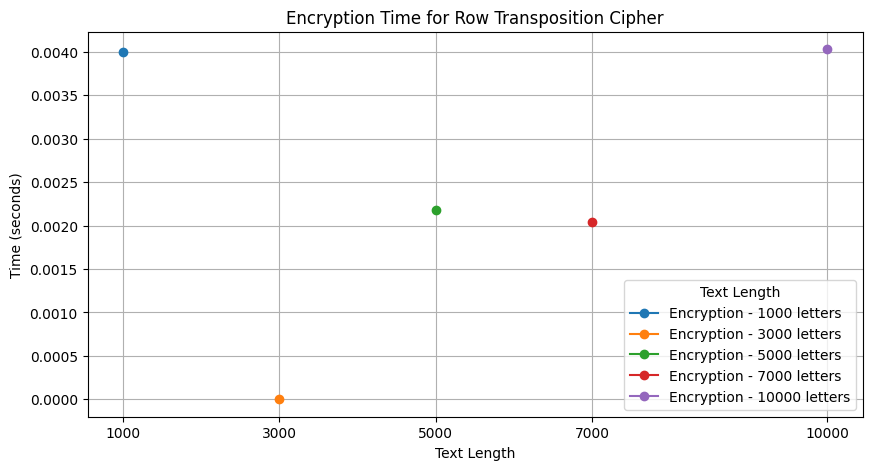

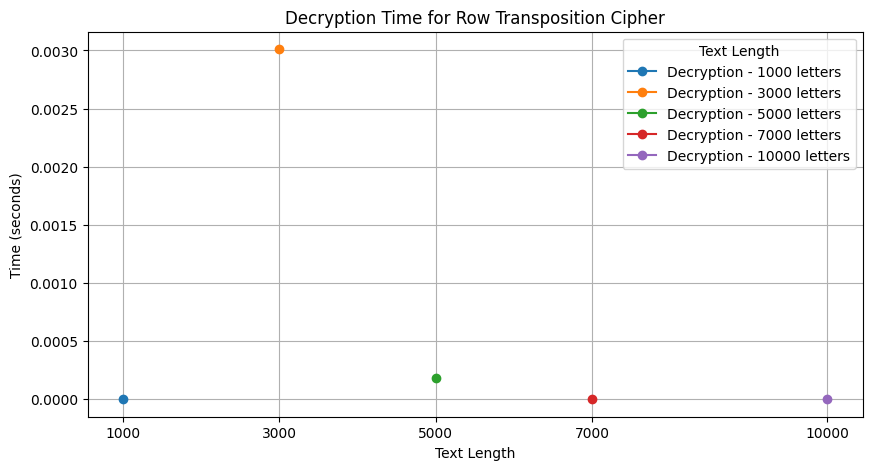

In [4]:
import time
import matplotlib.pyplot as plt
import random
import string

# Function to generate a random permutation for row transposition cipher
def generate_permutation(columns):
    permutation = list(range(columns))
    random.shuffle(permutation)
    return permutation

# Function to encrypt using row transposition cipher
def row_transposition_encrypt(plaintext, permutation, columns):
    ciphertext = ""
    rows = (len(plaintext) + columns - 1) // columns
    for i in range(rows):
        for j in permutation:
            index = i * columns + j
            if index < len(plaintext):
                ciphertext += plaintext[index]
    return ciphertext

# Function to decrypt using row transposition cipher
def row_transposition_decrypt(ciphertext, permutation, columns):
    plaintext = [''] * len(ciphertext)
    rows = (len(ciphertext) + columns - 1) // columns
    for i in range(rows):
        for j, pos in enumerate(permutation):
            index = i * len(permutation) + pos
            if index < len(ciphertext):
                plaintext[index] = ciphertext[i * len(permutation) + j]
    return ''.join(plaintext)

# Generate random texts with different lengths
text_lengths = [1000, 3000, 5000, 7000, 10000]

encryption_times = []
decryption_times = []

for length in text_lengths:
    random_text = ''.join(random.choices(string.ascii_uppercase, k=length))
    print(f"Text Length: {length}")
    
    columns = length // 100  # Choose number of columns for grid
    
    permutation = generate_permutation(columns)
    
    encryption_time_per_length = []
    decryption_time_per_length = []
    
    start_time = time.time()
    encrypted_text = row_transposition_encrypt(random_text, permutation, columns)
    encryption_time = time.time() - start_time
    encryption_time_per_length.append(encryption_time)
    
    start_time = time.time()
    decrypted_text = row_transposition_decrypt(encrypted_text, permutation, columns)
    decryption_time = time.time() - start_time
    decryption_time_per_length.append(decryption_time)
    
    print(f"Encryption Time: {encryption_time:.6f}s, Decryption Time: {decryption_time:.6f}s")
    
    encryption_times.append(encryption_time_per_length)
    decryption_times.append(decryption_time_per_length)
    print()

# Calculate average encryption time
average_encryption_time_row_transposition = sum([sum(times) for times in encryption_times]) / len(text_lengths)

# Calculate average decryption time
average_decryption_time_row_transposition = sum([sum(times) for times in decryption_times]) / len(text_lengths)

print(f"Average Encryption Time: {average_encryption_time_row_transposition:.6f}s")
print(f"Average Decryption Time: {average_decryption_time_row_transposition:.6f}s")

plt.figure(figsize=(10, 5))
for i, length in enumerate(text_lengths):
    plt.plot([length], encryption_times[i], marker='o', label=f"Encryption - {length} letters")

plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Encryption Time for Row Transposition Cipher')
plt.legend(title='Text Length')
plt.grid(True)
plt.xticks(text_lengths)  # Set x-ticks to text lengths
plt.show()

# Plotting Decryption Time
plt.figure(figsize=(10, 5))
for i, length in enumerate(text_lengths):
    plt.plot([length], decryption_times[i], marker='o', label=f"Decryption - {length} letters")

plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Decryption Time for Row Transposition Cipher')
plt.legend(title='Text Length')
plt.grid(True)
plt.xticks(text_lengths)  # Set x-ticks to text lengths
plt.show()


- DES Cipher

Text Length: 1000
Encryption Time: 0.000442s, Decryption Time: 0.000031s

Text Length: 3000
Encryption Time: 0.000033s, Decryption Time: 0.000206s

Text Length: 5000
Encryption Time: 0.000047s, Decryption Time: 0.000047s

Text Length: 7000
Encryption Time: 0.000066s, Decryption Time: 0.000066s

Text Length: 10000
Encryption Time: 0.000088s, Decryption Time: 0.000089s

Average Encryption Time: 0.000135s
Average Decryption Time: 0.000088s


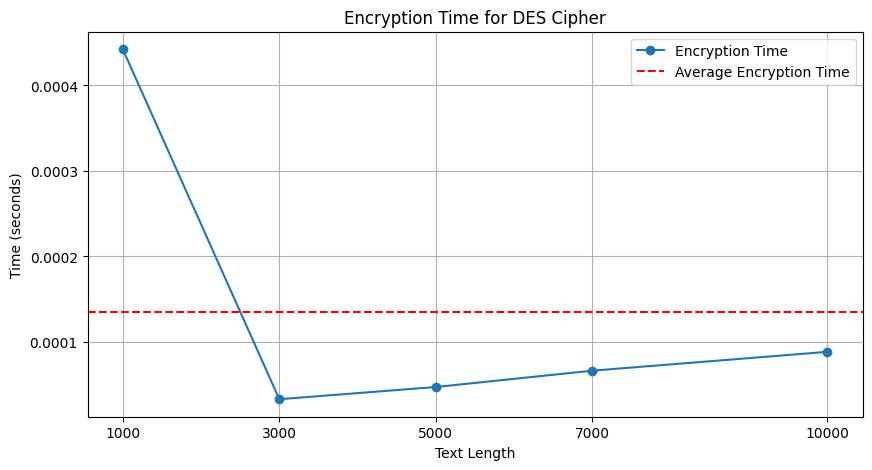

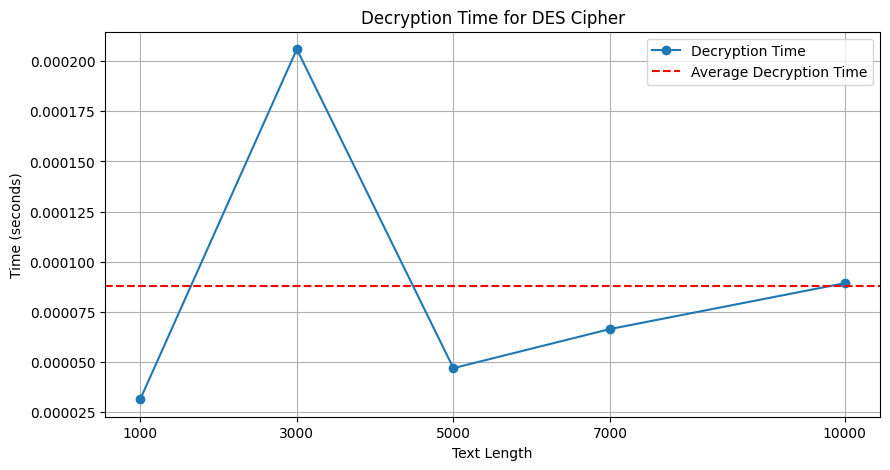

In [5]:
import time
import matplotlib.pyplot as plt
from Crypto.Cipher import DES
from Crypto.Random import get_random_bytes
import random
import string

# Function to generate random text
def generate_random_text(length):
    return ''.join(random.choices(string.ascii_uppercase, k=length))

# Function to pad text to be multiple of 8 bytes
def pad_text(text):
    pad_len = 8 - (len(text) % 8)
    return text + chr(pad_len) * pad_len

# Function to unpad text after decryption
def unpad_text(text):
    pad_len = ord(text[-1])
    return text[:-pad_len]

# Generate random texts with different lengths
text_lengths = [1000, 3000, 5000, 7000, 10000]

encryption_times = []
decryption_times = []

# Generate a random key for DES (8 bytes)
key = get_random_bytes(8)

for length in text_lengths:
    random_text = generate_random_text(length)
    print(f"Text Length: {length}")
    
    # Create a DES cipher object
    cipher = DES.new(key, DES.MODE_ECB)
    
    # Pad the random text to be a multiple of 8 bytes
    padded_text = pad_text(random_text)
    
    # Measure encryption time
    start_time = time.perf_counter()
    encrypted_text = cipher.encrypt(padded_text.encode('utf-8'))
    encryption_time = time.perf_counter() - start_time
    
    # Measure decryption time
    start_time = time.perf_counter()
    decrypted_text = cipher.decrypt(encrypted_text).decode('utf-8')
    decrypted_text = unpad_text(decrypted_text)
    decryption_time = time.perf_counter() - start_time
    
    # Ensure the decrypted text matches the original text
    assert decrypted_text == random_text, "Decryption failed!"
    
    print(f"Encryption Time: {encryption_time:.6f}s, Decryption Time: {decryption_time:.6f}s")
    
    encryption_times.append(encryption_time)
    decryption_times.append(decryption_time)
    print()

# Calculate average encryption and decryption times
avg_encryption_time_des = sum(encryption_times) / len(text_lengths)
avg_decryption_time_des = sum(decryption_times) / len(text_lengths)

print(f"Average Encryption Time: {avg_encryption_time_des:.6f}s")
print(f"Average Decryption Time: {avg_decryption_time_des:.6f}s")

# Plotting Encryption Time
plt.figure(figsize=(10, 5))
plt.plot(text_lengths, encryption_times, marker='o', label='Encryption Time')
plt.axhline(y=avg_encryption_time_des, color='r', linestyle='--', label='Average Encryption Time')
plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Encryption Time for DES Cipher')
plt.legend()
plt.grid(True)
plt.xticks(text_lengths)
plt.show()

# Plotting Decryption Time
plt.figure(figsize=(10, 5))
plt.plot(text_lengths, decryption_times, marker='o', label='Decryption Time')
plt.axhline(y=avg_decryption_time_des, color='r', linestyle='--', label='Average Decryption Time')
plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Decryption Time for DES Cipher')
plt.legend()
plt.grid(True)
plt.xticks(text_lengths)
plt.show()


- AES

Text Length: 1000
Encryption Time: 0.000024s, Decryption Time: 0.000017s

Text Length: 3000
Encryption Time: 0.000017s, Decryption Time: 0.000010s

Text Length: 5000
Encryption Time: 0.000010s, Decryption Time: 0.000020s

Text Length: 7000
Encryption Time: 0.000025s, Decryption Time: 0.000007s

Text Length: 10000
Encryption Time: 0.000380s, Decryption Time: 0.000036s

Average Encryption Time: 0.000091s
Average Decryption Time: 0.000018s


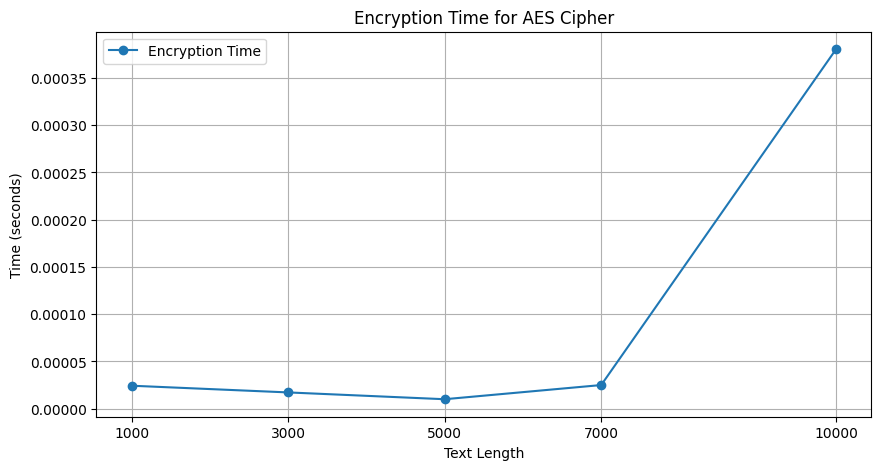

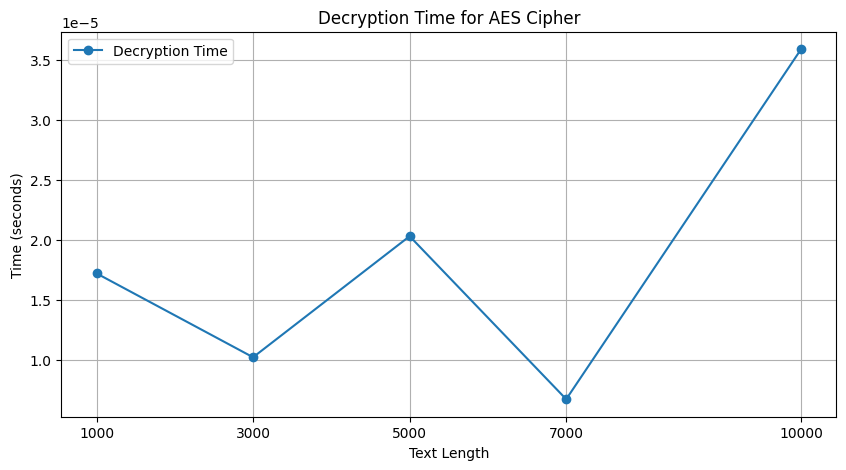

In [6]:
import time
import matplotlib.pyplot as plt
from Crypto.Cipher import AES
from Crypto.Random import get_random_bytes
import random
import string

# Function to generate random text
def generate_random_text(length):
    return ''.join(random.choices(string.ascii_uppercase, k=length))

# Function to pad text to be multiple of AES block size (16 bytes)
def pad_text(text):
    pad_len = 16 - (len(text) % 16)
    return text + chr(pad_len) * pad_len

# Function to unpad text after decryption
def unpad_text(text):
    pad_len = ord(text[-1])
    return text[:-pad_len]

# Generate random texts with different lengths
text_lengths = [1000, 3000, 5000, 7000, 10000]

encryption_times = []
decryption_times = []

# Generate a random key for AES (16 bytes for AES-128)
key = get_random_bytes(16)

encryption_total_time = 0
decryption_total_time = 0

for length in text_lengths:
    random_text = generate_random_text(length)
    print(f"Text Length: {length}")
    
    # Create an AES cipher object
    cipher = AES.new(key, AES.MODE_ECB)
    
    # Pad the random text to be a multiple of 16 bytes
    padded_text = pad_text(random_text)
    
    # Measure encryption time
    start_time = time.perf_counter()
    encrypted_text = cipher.encrypt(padded_text.encode('utf-8'))
    encryption_time = time.perf_counter() - start_time
    
    # Measure decryption time
    start_time = time.perf_counter()
    decrypted_text = cipher.decrypt(encrypted_text).decode('utf-8')
    decrypted_text = unpad_text(decrypted_text)
    decryption_time = time.perf_counter() - start_time
    
    # Ensure the decrypted text matches the original text
    assert decrypted_text == random_text, "Decryption failed!"
    
    print(f"Encryption Time: {encryption_time:.6f}s, Decryption Time: {decryption_time:.6f}s")
    
    encryption_times.append(encryption_time)
    decryption_times.append(decryption_time)
    
    encryption_total_time += encryption_time
    decryption_total_time += decryption_time
    
    print()

# Calculate average encryption and decryption times
average_encryption_time_aes = encryption_total_time / len(text_lengths)
average_decryption_time_aes = decryption_total_time / len(text_lengths)

print(f"Average Encryption Time: {average_encryption_time_aes:.6f}s")
print(f"Average Decryption Time: {average_decryption_time_aes:.6f}s")

# Plotting Encryption Time
plt.figure(figsize=(10, 5))
plt.plot(text_lengths, encryption_times, marker='o', label='Encryption Time')
plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Encryption Time for AES Cipher')
plt.legend()
plt.grid(True)
plt.xticks(text_lengths)
plt.show()

# Plotting Decryption Time
plt.figure(figsize=(10, 5))
plt.plot(text_lengths, decryption_times, marker='o', label='Decryption Time')
plt.xlabel('Text Length')
plt.ylabel('Time (seconds)')
plt.title('Decryption Time for AES Cipher')
plt.legend()
plt.grid(True)
plt.xticks(text_lengths)
plt.show()


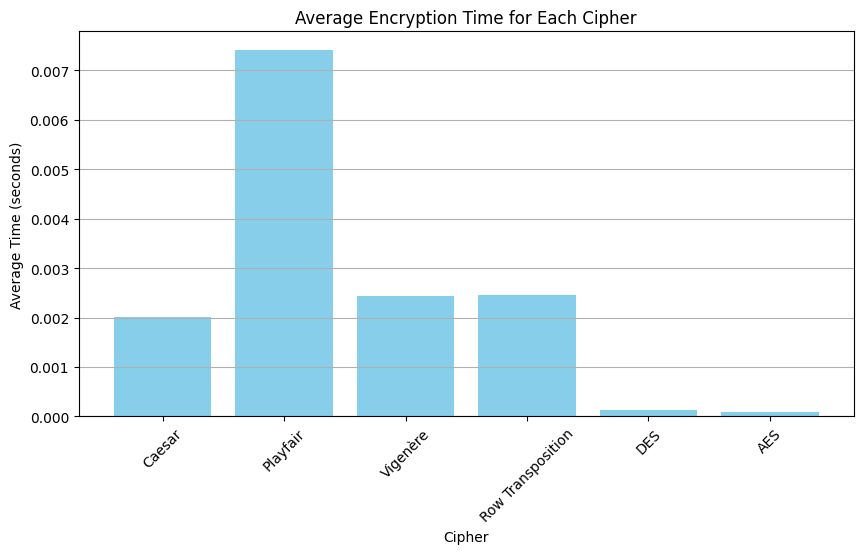

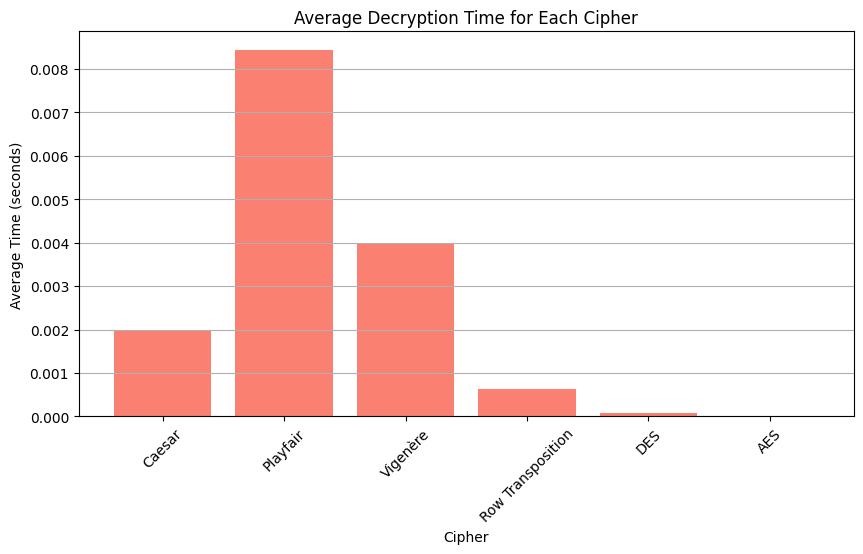

In [7]:
import matplotlib.pyplot as plt

# Average encryption times for each cipher
encryption_times = [overall_encryption_average, 
                    avg_encryption_time_playfair, 
                    avg_encryption_time, 
                    average_encryption_time_row_transposition, 
                    avg_encryption_time_des, 
                    average_encryption_time_aes]

# Average decryption times for each cipher
decryption_times = [overall_decryption_average, 
                    avg_decryption_time_playfair, 
                    avg_decryption_time, 
                    average_decryption_time_row_transposition, 
                    avg_decryption_time_des, 
                    average_decryption_time_aes]

ciphers = ['Caesar', 'Playfair', 'Vigenère', 'Row Transposition', 'DES', 'AES']

# Plotting average encryption times
plt.figure(figsize=(10, 5))
plt.bar(ciphers, encryption_times, color='skyblue')
plt.xlabel('Cipher')
plt.ylabel('Average Time (seconds)')
plt.title('Average Encryption Time for Each Cipher')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()

# Plotting average decryption times
plt.figure(figsize=(10, 5))
plt.bar(ciphers, decryption_times, color='salmon')
plt.xlabel('Cipher')
plt.ylabel('Average Time (seconds)')
plt.title('Average Decryption Time for Each Cipher')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.show()
